In [ ]:
# 1. Cargar librerías
import pandas as pd
from pycaret.classification import *

# 2. Cargar datos
df = pd.read_csv('D:/Archivos - Visual Studio Code - Python/Bases de datos/caso1_churn_clientes.csv')

# 3. Configuración del entorno
clf = setup(data=df,
            target='churn',
            session_id=123,
            normalize=True,
            categorical_features=['tipo_plan'])

In [ ]:
# 4. Comparación de modelos para explorar
best_model = compare_models(sort='AUC')

# 5. Crear modelo con mejor balance
rf_model = create_model('rf')

# 6. Ajustar hiperparámetros
tuned_rf = tune_model(rf_model)

In [ ]:
# 7. Interpretación y visualización
plot_model(tuned_rf, plot='confusion_matrix')
plot_model(tuned_rf, plot='feature')

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(300, 7)"
4,Transformed data shape,"(300, 9)"
5,Transformed train set shape,"(210, 9)"
6,Transformed test set shape,"(90, 9)"
7,Numeric features,5
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7286,0.6922,0.1133,0.3083,0.1613,0.0777,0.0902,0.0220
lda,Linear Discriminant Analysis,0.7286,0.6922,0.2033,0.3967,0.2620,0.1392,0.1480,0.0160
lr,Logistic Regression,0.7286,0.6846,0.1833,0.4300,0.2453,0.1276,0.1470,0.5370
nb,Naive Bayes,0.7000,0.6753,0.3500,0.4710,0.3839,0.1932,0.2060,0.0180
ada,Ada Boost Classifier,0.6905,0.6517,0.2267,0.3117,0.2530,0.0918,0.0912,0.0380
gbc,Gradient Boosting Classifier,0.6857,0.6312,0.2433,0.3917,0.2659,0.0877,0.1076,0.0440
qda,Quadratic Discriminant Analysis,0.6714,0.6144,0.3467,0.3583,0.3459,0.1302,0.1315,0.0190
rf,Random Forest Classifier,0.6952,0.6132,0.1500,0.2733,0.1808,0.0373,0.0376,0.0680
lightgbm,Light Gradient Boosting Machine,0.6952,0.5986,0.2833,0.3731,0.3056,0.1365,0.1453,0.0400
svm,SVM - Linear Kernel,0.5714,0.5788,0.3433,0.2597,0.2759,-0.0043,-0.0036,0.0180


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,0.8625,0.8000,1.0000,0.8889,0.8591,0.8677
1,0.7619,0.8062,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7143,0.5312,0.0000,0.0000,0.0000,-0.0862,-0.1250
3,0.6667,0.4812,0.0000,0.0000,0.0000,-0.1575,-0.1814
4,0.8095,0.7062,0.2000,1.0000,0.3333,0.2759,0.4000
5,0.6190,0.4333,0.0000,0.0000,0.0000,-0.1667,-0.2052
6,0.6667,0.5889,0.3333,0.4000,0.3636,0.1404,0.1414
7,0.5714,0.5778,0.0000,0.0000,0.0000,-0.2353,-0.2582
8,0.5238,0.4611,0.0000,0.0000,0.0000,-0.2963,-0.3068


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7619,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.7619,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7619,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.7619,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.7143,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.7143,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7143,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.7143,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


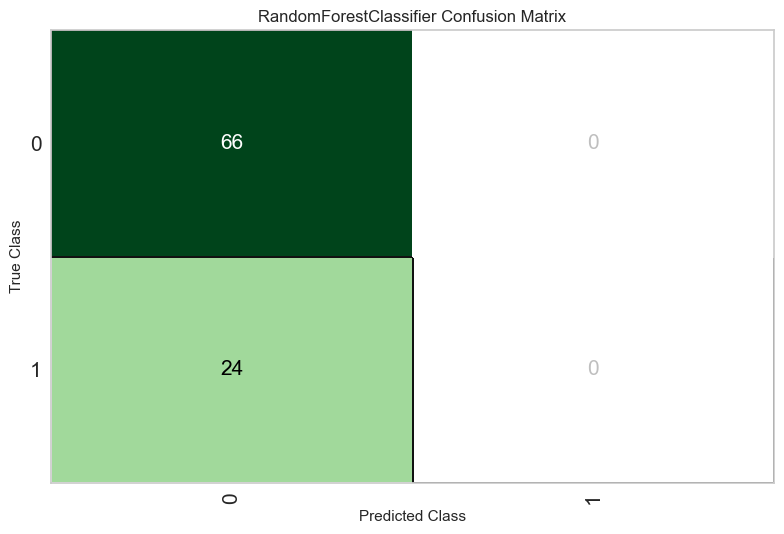

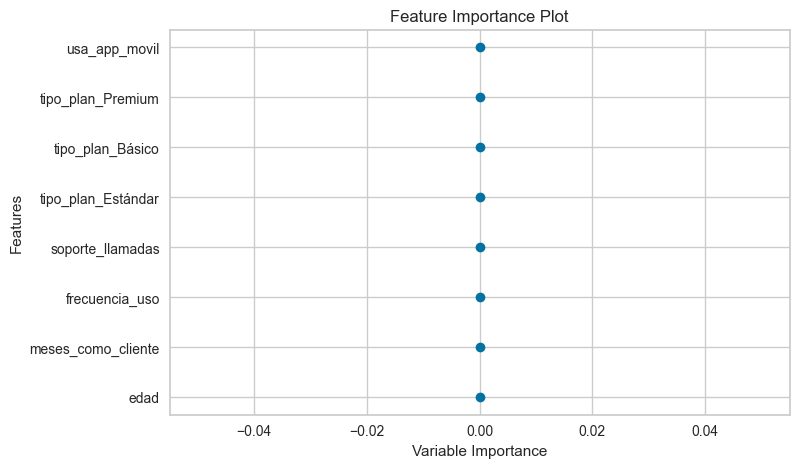

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7333,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['edad', 'meses_como_cliente',
                                              'frecuencia_uso',
                                              'soporte_llamadas',
                                              'usa_app_movil'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  Tra...
                  RandomForestClassifier

In [ ]:
# 8. Evaluación interactiva
evaluate_model(tuned_rf)

# 9. Predicciones
predicciones = predict_model(tuned_rf)

# 10. Guardar modelo final para uso futuro
save_model(tuned_rf, 'modelo_churn_final')